# Protection numérique des sources journalistiques - l'artiste responsable

## 1. Import des librairies pour la réalisation de nos tests

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
sns.set(color_codes=True)

## 2. Initialisation des fonctions

In [2]:
def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    results = sm.OLS(y, X).fit()
    return results

def calculate_pvalues(df):
    df = df._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            if c == r:
                df_corr = df[[r]].dropna()
            else:
                df_corr = df[[r,c]].dropna()
            pvalues[r][c] = scipy.stats.pearsonr(df_corr[r], df_corr[c])[1]
    return pvalues

def calculate_pvaluesSpear(df):
    df = df._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            if c == r:
                df_corr = df[[r]].dropna()
            else:
                df_corr = df[[r,c]].dropna()
            pvalues[r][c] = scipy.stats.spearmanr(df_corr[r], df_corr[c])[1]
    return pvalues


## 3 Import des données et création des variables

In [3]:
datas = pd.read_csv("C:/datas.csv", delimiter=";")

# Variable dépendante = mise en œuvre d’une protection numérique des source
dv1 = datas[['MEOAttentionSecurite', 'MEOUtiliseOutils', 'MEOSecuriseAcces', 'MEOSensibiliseSources', 'MEOProtectionEquivalente', 'MEODestructionSecure']]
dv1Median = dv1.median(axis=1)

# Variable contextuelle 1 = intérêt
vc1 = datas[['percUtilite', 'percBenefice', 'percImportance', 'percMeConcerne']]
vc1Median = vc1.median(axis=1)

# Variable contextuelle 2 = connaissances subjective
vc2 = datas[['nivConnaiPercueAmis', 'nivConnaiPercueJournalistes', 'nivConnaiPercueExperts']]
vc2Median = vc2.median(axis=1)

#### Hypothèse 1 ####
#### Hypothèses explicatives 1.1 2.2 3.3 ####

# Variable indépendante 1.1 = niveau de menaces subjectives
iv1_1 = datas[['percMenaceCyber', 'percMenaceSocialInge', 'percMenaceEcoute', 'percMenaceCambriolage', 'percMenacePoursuites']]
iv1_1Median = iv1_1.median(axis=1)

# Variable indépendante 1.2 = niveau de conséquences subjectives
iv1_2 = datas[['percConsequenceImageEntr', 'percConsequenceImageJourn', 'percConsequenceIntegrite', 'percConsequenceLicenciement', 'percConsequencePrison']]
iv1_2Median = iv1_2.median(axis=1)

# Variable indépendante 1.3 = cours dédiés suivi dans la formation journalistique
iv1_3 = datas[['suiviCoursSuivi', 'suiviCoursPropose', 'suiviCoursEntendu']]
iv1_3Median = iv1_3.median(axis=1)

# Variable indépendante 1 = niveau de sensibilisation
iv1 = pd.concat([iv1_1Median, iv1_2Median, iv1_3Median], axis=1)
iv1Median = iv1.median(axis=1)


#### Hypothèse 2 ####
#### Hypothèses explicatives 2.1 2.2 2.3 ####

# Variable indépendante 2.1 = supports dédiés
iv2_1 = datas[['MEPProcess', 'MEPProcessUtilite']]
iv2_1Median = iv2_1.median(axis=1)

# Variable indépendante 2.2 = outils dédiés
iv2_2 = datas[['MEPOutils', 'MEPOutilsUtilite']]
iv2_2Median = iv2_2.median(axis=1)

# Variable indépendante 2.2 = formation continue dédiée
iv2_3 = datas[['suiviCoursEntrepriseSuivi', 'suiviCoursEntreprisePropose', 'suiviCoursEntrepriseEntendu']]
iv2_3Median = iv2_3.median(axis=1)

# Variable indépendante 2 = niveau de soutien opérationnel
iv2 = pd.concat([iv2_1Median, iv2_2Median, iv2_3Median], axis=1)
iv2Median = iv2.median(axis=1)


## 4 Vérification du modèle conceptuel

### 4.1 Corrélation multi-facteurs

,Mise en oeuvre,Intérêt,Connaissances,Sensibilisation,Menaces,Conséquences,Cours en formation,Soutien opérationnel,Supports,Outils,Formation continue
Mise en oeuvre,1.00*,0.38*,0.58*,0.54*,0.52*,0.35*,0.33*,0.26*,0.20,0.43*,0.19
Intérêt,0.38*,1.00*,0.20,0.23,0.18,0.10,0.28*,0.02,0.09,-0.02,-0.05
Connaissances,0.58*,0.20,1.00*,0.53*,0.34*,0.27*,0.42*,0.05,0.00,0.18,-0.02
Sensibilisation,0.54*,0.23,0.53*,1.00*,0.57*,0.65*,0.40*,0.03,0.06,0.09,0.07
Menaces,0.52*,0.18,0.34*,0.57*,1.00*,0.21,-0.11,-0.10,-0.12,0.35*,-0.07
Conséquences,0.35*,0.10,0.27*,0.65*,0.21,1.00*,0.07,0.10,0.04,0.03,0.04
Cours en formation,0.33*,0.28*,0.42*,0.40*,-0.11,0.07,1.00*,0.03,0.18,0.04,0.05
Soutien opérationnel,0.26*,0.02,0.05,0.03,-0.10,0.10,0.03,1.00*,0.82*,0.49*,0.69*
Supports,0.20,0.09,0.00,0.06,-0.12,0.04,0.18,0.82*,1.00*,0.35*,0.53*
Outils,0.43*,-0.02,0.18,0.09,0.35*,0.03,0.04,0.49*,0.35*,1.00*,0.29*


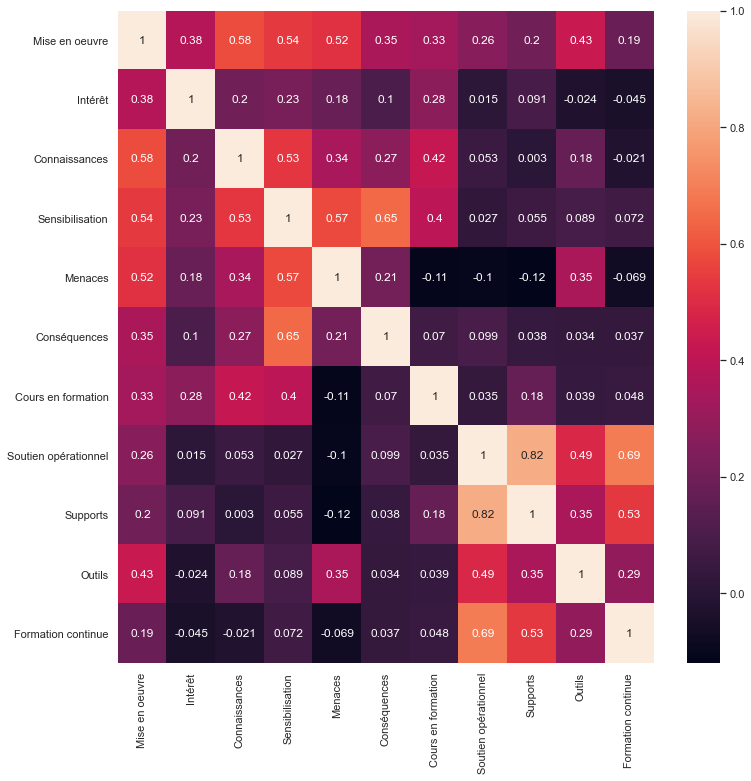

In [4]:
# Concaténation variable dépendante et facteurs explicatifs
facteurs = pd.concat([dv1Median, vc1Median, vc2Median, iv1Median, iv1_1Median, iv1_2Median, iv1_3Median, iv2Median, iv2_1Median, iv2_2Median, iv2_3Median], axis=1)
facteurs.columns = ["Mise en oeuvre", "Intérêt", "Connaissances", "Sensibilisation", "Menaces", "Conséquences", "Cours en formation", "Soutien opérationnel", "Supports", "Outils", "Formation continue"]

# Calcul de la significativité
pval = calculate_pvalues(facteurs)

# Calcul du Coefficient de corrélation de Pearson
rho = facteurs.corr(method='pearson')

# Définition de la taille du graphe
plt.rcParams["figure.figsize"] = [12,12]



# Affichage sur un graphe
sns.heatmap(data=rho, annot=True, color="black")

# Sauvegarde du graphe
plt.savefig("CorrelationMultiFacteurs.pdf")

# Représentation des p-values
r1 = rho.applymap(lambda x: '{:.2f}'.format(x))
r2 = rho.applymap(lambda x: '{:.2f}*'.format(x))
rho = rho.mask(pval>0.05,r1)
rho = rho.mask(pval<=0.05,r2)
rho



### 4.2 Impact de l'intêret sur la mise en œuvre d’une protection numérique des sources

0.0036767


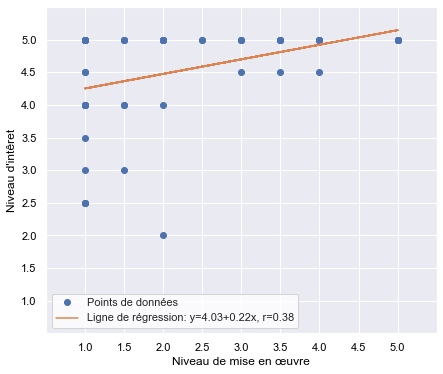

In [5]:
x = dv1Median
y = vc1Median

# slope, intersept, and correlation coefficient calculation
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Ligne de régression: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

# Affiche la significativité
print(round(p, 7))

# Affichage du graphe
fig, ax = plt.subplots(figsize = (7,6))
ax.plot(x, y, linewidth=0, marker='o', label='Points de données')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('Niveau de mise en œuvre', color="black")
ax.set_ylabel('Niveau d\'intêret', color="black")
ax.set_ylim(ymin=0.5, ymax=5.5)
ax.set_xlim(xmin=0.5, xmax=5.5)
ax.set_yticks([1,1.5,2,2.5,3,3.5,4,4.5,5])
ax.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5])
ax.legend(facecolor='white')
ax.tick_params(labelcolor='black')

# Sauvegarde du graphe
plt.savefig("CorrelationDv1-vc1.pdf")
plt.show()

### 4.3 Impact de la connaissance subjective sur la mise en œuvre d’une protection numérique des sources

2.7e-06


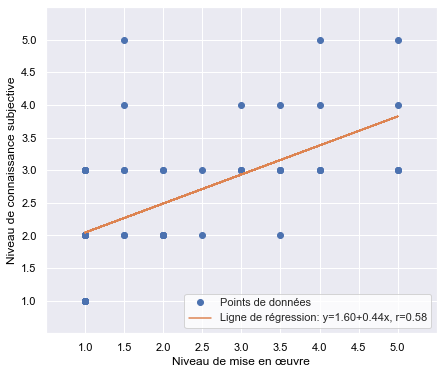

In [6]:
x = dv1Median
y = vc2Median

# slope, intersept, and correlation coefficient calculation
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Ligne de régression: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

# Affiche la significativité
print(round(p, 7))

# Affichage du graphe
fig, ax = plt.subplots(figsize = (7,6))
ax.plot(x, y, linewidth=0, marker='o', label='Points de données')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('Niveau de mise en œuvre', color="black")
ax.set_ylabel('Niveau de connaissance subjective', color="black")
ax.set_ylim(ymin=0.5, ymax=5.5)
ax.set_xlim(xmin=0.5, xmax=5.5)
ax.set_yticks([1,1.5,2,2.5,3,3.5,4,4.5,5])
ax.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5])
ax.legend(facecolor='white')
ax.tick_params(labelcolor='black')

# Sauvegarde du graphe
plt.savefig("CorrelationDv1-vc2.pdf")
plt.show()

### 4.4 Impact du niveau de sensibilisation sur la mise en œuvre d’une protection numérique des sources

In [7]:

x = np.concatenate([[iv1_1Median], [iv1_2Median], [iv1_3Median]])
y = dv1Median

res = reg_m(y, x)

print(res.summary(), "PVAL =",res.pvalues)



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     15.04
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           3.59e-07
Time:                        21:19:56   Log-Likelihood:                -78.611
No. Observations:                  56   AIC:                             165.2
Df Residuals:                      52   BIC:                             173.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2972      0.082      3.637      0.0

#### 4.4.1 Impact du niveau de menaces subjectif sur la mise en œuvre d’une protection numérique des sources

         0        1
0  1.00000  0.43867
1  0.43867  1.00000
0.0007200449247130043


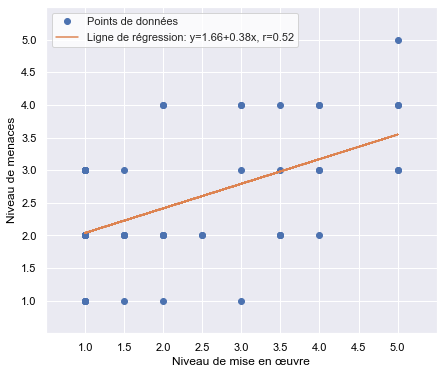

In [8]:
x = dv1Median
y = iv1_1Median

Dv1Iv1_1 = pd.concat([dv1Median, iv1_1Median], axis=1)
pval = calculate_pvaluesSpear(Dv1Iv1_1)

# Calcul du Coefficient de corrélation de Spearman
rho = Dv1Iv1_1.corr(method='spearman')

print(rho)

# slope, intersept, and correlation coefficient calculation
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Ligne de régression: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

# Affiche la significativité
print(pval[0][1])

# Affichage du graphe
fig, ax = plt.subplots(figsize = (7,6))
ax.plot(x, y, linewidth=0, marker='o', label='Points de données')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('Niveau de mise en œuvre', color="black")
ax.set_ylabel('Niveau de menaces', color="black")
ax.set_ylim(ymin=0.5, ymax=5.5)
ax.set_xlim(xmin=0.5, xmax=5.5)
ax.set_yticks([1,1.5,2,2.5,3,3.5,4,4.5,5])
ax.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5])
ax.legend(facecolor='white')
ax.tick_params(labelcolor='black')

# Sauvegarde du graphe
plt.savefig("CorrelationDv1-Iv1_1.pdf")
plt.show()

#### 4.4.2 Impact du niveau de conséquences subjectif sur la mise en œuvre d’une protection numérique des sources

          0         1
0  1.000000  0.371973
1  0.371973  1.000000
0.004759542274018582


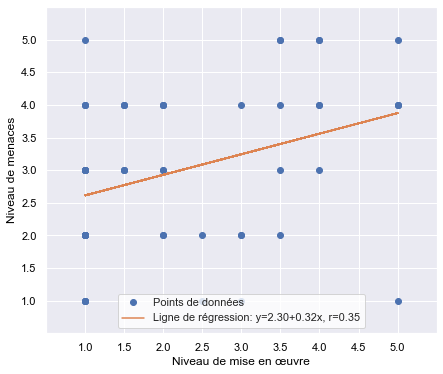

In [9]:
x = dv1Median
y = iv1_2Median

Dv1Iv1_2 = pd.concat([dv1Median, iv1_2Median], axis=1)
pval = calculate_pvaluesSpear(Dv1Iv1_2)

# Calcul du Coefficient de corrélation de Spearman
rho = Dv1Iv1_2.corr(method='spearman')

print(rho)

# slope, intersept, and correlation coefficient calculation
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Ligne de régression: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

# Affiche la significativité
print(pval[0][1])

# Affichage du graphe
fig, ax = plt.subplots(figsize = (7,6))
ax.plot(x, y, linewidth=0, marker='o', label='Points de données')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('Niveau de mise en œuvre', color="black")
ax.set_ylabel('Niveau de menaces', color="black")
ax.set_ylim(ymin=0.5, ymax=5.5)
ax.set_xlim(xmin=0.5, xmax=5.5)
ax.set_yticks([1,1.5,2,2.5,3,3.5,4,4.5,5])
ax.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5])
ax.legend(facecolor='white')
ax.tick_params(labelcolor='black')

# Sauvegarde du graphe
plt.savefig("CorrelationDv1-Iv1_2.pdf")
plt.show()

#### 4.4.3 Impact de l’absence de cours dédiés dans la formation journalistique sur la mise en œuvre d’une protection numérique des sources

0.0121436


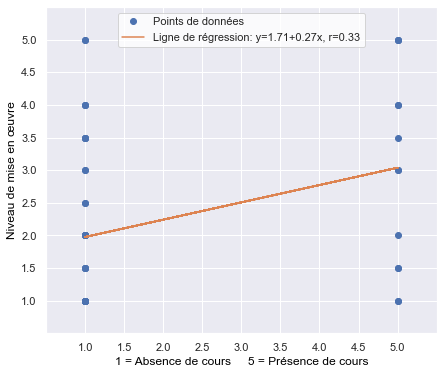

In [10]:
x = iv1_3Median
y = dv1Median

# slope, intersept, and correlation coefficient calculation
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Ligne de régression: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

# Affiche la significativité
print(round(p, 7))

# Affichage du graphe
fig, ax = plt.subplots(figsize = (7,6))
ax.plot(x, y, linewidth=0, marker='o', label='Points de données')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('1 = Absence de cours     5 = Présence de cours', color="black")
ax.set_ylabel('Niveau de mise en œuvre', color="black")
ax.set_ylim(ymin=0.5, ymax=5.5)
ax.set_xlim(xmin=0.5, xmax=5.5)
ax.set_yticks([1,1.5,2,2.5,3,3.5,4,4.5,5])
ax.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5])
ax.legend(facecolor='white')

# Sauvegarde du graphe
plt.savefig("CorrelationDv1-Iv1_3.pdf")
plt.show()

### 4.5 Impact du niveau de soutien opérationnel sur la mise en œuvre d’une protection numérique des sources

In [11]:


x = np.concatenate([[iv2_1Median], [iv2_2Median], [iv2_3Median]])
y = dv1Median

res = reg_m(y, x)

print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     4.119
Date:                Mon, 07 Dec 2020   Prob (F-statistic):             0.0107
Time:                        21:19:57   Log-Likelihood:                -90.131
No. Observations:                  56   AIC:                             188.3
Df Residuals:                      52   BIC:                             196.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0432      0.126      0.344      0.7

#### 4.5.1 Impact de l’absence de supports sur la mise en œuvre d’une protection numérique des sources

0.1353188


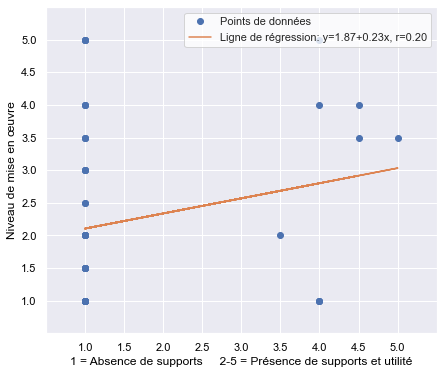

In [12]:
x = iv2_1Median
y = dv1Median

# slope, intersept, and correlation coefficient calculation
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Ligne de régression: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

# Affiche la significativité
print(round(p, 7))

# Affichage du graphe
fig, ax = plt.subplots(figsize = (7,6))
ax.plot(x, y, linewidth=0, marker='o', label='Points de données')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('1 = Absence de supports     2-5 = Présence de supports et utilité', color="black")
ax.set_ylabel('Niveau de mise en œuvre', color="black")
ax.set_ylim(ymin=0.5, ymax=5.5)
ax.set_xlim(xmin=0.5, xmax=5.5)
ax.set_yticks([1,1.5,2,2.5,3,3.5,4,4.5,5])
ax.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5])
ax.legend(facecolor='white')
ax.tick_params(labelcolor='black')

# Sauvegarde du graphe
plt.savefig("CorrelationDv1-Iv2_1.pdf")
plt.show()

#### 4.5.2 Impact de l’absence d’outils sur la mise en œuvre d’une protection numérique des sources

0.1120932


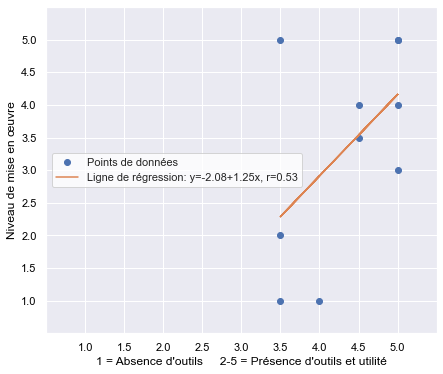

In [20]:
x = iv2_2Median
y = dv1Median

# slope, intersept, and correlation coefficient calculation
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Ligne de régression: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

# Affiche la significativité
print(round(p, 7))

# Affichage du graphe
fig, ax = plt.subplots(figsize = (7,6))
ax.plot(x, y, linewidth=0, marker='o', label='Points de données')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('1 = Absence d\'outils     2-5 = Présence d\'outils et utilité', color="black")
ax.set_ylabel('Niveau de mise en œuvre', color="black")
ax.set_ylim(ymin=0.5, ymax=5.5)
ax.set_xlim(xmin=0.5, xmax=5.5)
ax.set_yticks([1,1.5,2,2.5,3,3.5,4,4.5,5])
ax.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5])
ax.legend(facecolor='white')
ax.tick_params(labelcolor='black')

# Sauvegarde du graphe
plt.savefig("CorrelationDv1-Iv2_2.pdf")
plt.show()

#### 4.5.3 Impact de l’absence de formation continue sur la mise en œuvre d’une protection numérique des sources

0.1719038


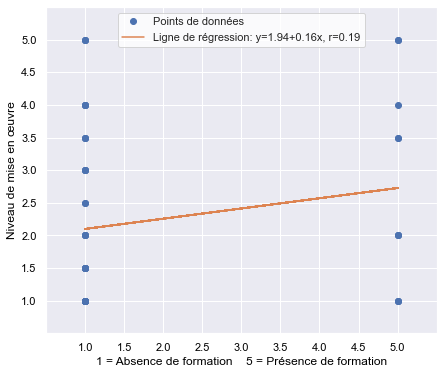

In [14]:
x = iv2_3Median
y = dv1Median

# slope, intersept, and correlation coefficient calculation
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Ligne de régression: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

# Affiche la significativité
print(round(p, 7))

# Affichage du graphe
fig, ax = plt.subplots(figsize = (7,6))
ax.plot(x, y, linewidth=0, marker='o', label='Points de données')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('1 = Absence de formation    5 = Présence de formation', color="black")
ax.set_ylabel('Niveau de mise en œuvre', color="black")
ax.set_ylim(ymin=0.5, ymax=5.5)
ax.set_xlim(xmin=0.5, xmax=5.5)
ax.set_yticks([1,1.5,2,2.5,3,3.5,4,4.5,5])
ax.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5])
ax.legend(facecolor='white')
ax.tick_params(labelcolor='black')

# Sauvegarde du graphe
plt.savefig("CorrelationDv1-Iv2_3.pdf")
plt.show()

## 5 Discussion

### 5.1 Comparaison de l'intéret entre 2 groupes de journalistes : ceux ayant suivi des cours dédiés durant leur formation et les autres

In [15]:
datasSuiviCours = datas[datas.suiviCoursSuivi == 5]
datasSuiviCoursMedian = datasSuiviCours[['percUtilite', 'percBenefice', 'percImportance', 'percMeConcerne']].median(axis=1)

datasPasSuiviCours = datas[datas.suiviCoursSuivi == 1]
datasPasSuiviCoursMedian = datasPasSuiviCours[['percUtilite', 'percBenefice', 'percImportance', 'percMeConcerne']].median(axis=1)

interetMoyenSuiviCours = datasSuiviCoursMedian.mean()
interetMoyenPasSuiviCours = datasPasSuiviCoursMedian.mean()

print("Moyenne de l'intêret de ceux qui ont suivi des cours = ", interetMoyenSuiviCours)
print("Moyenne de l'intêret de ceux qui n'ont pas suivi de cours = ", interetMoyenPasSuiviCours)
print("Différence entre les deux groupes = ", interetMoyenSuiviCours - interetMoyenPasSuiviCours)

Moyenne de l'intêret de ceux qui ont suivi des cours =  4.916666666666667
Moyenne de l'intêret de ceux qui n'ont pas suivi de cours =  4.420454545454546
Différence entre les deux groupes =  0.4962121212121211


### 5.2 Comparaison des facteurs entre 2 groupes de journalistes : ceux ayant des connaissances supérieures à la moyenne et les autres

In [16]:
# Calcul de la moyenne des connaissances subjectives
moyConnaissances = vc2Median.mean()

datasConnaiSuppMoyenne = datas[datas[['nivConnaiPercueAmis', 'nivConnaiPercueJournalistes', 'nivConnaiPercueExperts']].median(axis=1) > moyConnaissances]
datasConnaiSuppMoyenneMedian =  datasConnaiSuppMoyenne[['nivConnaiPercueAmis', 'nivConnaiPercueJournalistes', 'nivConnaiPercueExperts']].median(axis=1)

datasConnaiInfMoyenne = datas[datas[['nivConnaiPercueAmis', 'nivConnaiPercueJournalistes', 'nivConnaiPercueExperts']].median(axis=1) < moyConnaissances]
datasConnaiInfMoyenneMedian = datasConnaiInfMoyenne[['nivConnaiPercueAmis', 'nivConnaiPercueJournalistes', 'nivConnaiPercueExperts']].median(axis=1)


iv1_1ConnaiSuppMoyenneMedian = datasConnaiSuppMoyenne[['percMenaceCyber', 'percMenaceSocialInge', 'percMenaceEcoute', 'percMenaceCambriolage', 'percMenacePoursuites']].median(axis=1)
iv1_1ConnaiInfMoyenneMedian = datasConnaiInfMoyenne[['percMenaceCyber', 'percMenaceSocialInge', 'percMenaceEcoute', 'percMenaceCambriolage', 'percMenacePoursuites']].median(axis=1)

iv1_2ConnaiSuppMoyenneMedian = datasConnaiSuppMoyenne[['percConsequenceImageEntr', 'percConsequenceImageJourn', 'percConsequenceIntegrite', 'percConsequenceLicenciement', 'percConsequencePrison']].median(axis=1)
iv1_2ConnaiInfMoyenneMedian = datasConnaiInfMoyenne[['percConsequenceImageEntr', 'percConsequenceImageJourn', 'percConsequenceIntegrite', 'percConsequenceLicenciement', 'percConsequencePrison']].median(axis=1)

iv1_3ConnaiSuppMoyenneMedian = datasConnaiSuppMoyenne[['suiviCoursSuivi', 'suiviCoursPropose', 'suiviCoursEntendu']].median(axis=1)
iv1_3ConnaiInfMoyenneMedian = datasConnaiInfMoyenne[['suiviCoursSuivi', 'suiviCoursPropose', 'suiviCoursEntendu']].median(axis=1)


# Variable dépendante = mise en œuvre d’une protection numérique des source
dv1ConnaiSuppMoyenneMedian = datasConnaiSuppMoyenne[['MEOAttentionSecurite', 'MEOUtiliseOutils', 'MEOSecuriseAcces', 'MEOSensibiliseSources', 'MEOProtectionEquivalente', 'MEODestructionSecure']].median(axis=1)
dv1ConnaiInfMoyenneMedian = datasConnaiInfMoyenne[['MEOAttentionSecurite', 'MEOUtiliseOutils', 'MEOSecuriseAcces', 'MEOSensibiliseSources', 'MEOProtectionEquivalente', 'MEODestructionSecure']].median(axis=1)

moyDv1ConnaiSuppMoyenne = dv1ConnaiSuppMoyenneMedian.mean()
moyDv1ConnaiInfMoyenne = dv1ConnaiInfMoyenneMedian.mean()

moyiv1_1ConnaiSuppMoyenne = iv1_1ConnaiSuppMoyenneMedian.mean()
moyiv1_1ConnaiInfMoyenne = iv1_1ConnaiInfMoyenneMedian.mean()

moyiv1_2ConnaiSuppMoyenne = iv1_2ConnaiSuppMoyenneMedian.mean()
moyiv1_2ConnaiInfMoyenne = iv1_2ConnaiInfMoyenneMedian.mean()

moyiv1_3ConnaiSuppMoyenne = iv1_3ConnaiSuppMoyenneMedian.mean()
moyiv1_3ConnaiInfMoyenne = iv1_3ConnaiInfMoyenneMedian.mean()

print("Mise en oeuvre pour le groupe avec des connaissances supérieures à la moyenne = ", moyDv1ConnaiSuppMoyenne)
print("Mise en oeuvre pour le groupe avec des connaissances inférieures à la moyenne = ", moyDv1ConnaiInfMoyenne)
print("Différence entre les deux groupes = ", moyDv1ConnaiSuppMoyenne - moyDv1ConnaiInfMoyenne)
print("-----------------------------")
print("Niveau de menaces pour le groupe avec des connaissances supérieures à la moyenne = ", moyiv1_1ConnaiSuppMoyenne)
print("Niveau de menaces pour le groupe avec des connaissances inférieures à la moyenne = ", moyiv1_1ConnaiInfMoyenne)
print("Différence entre les deux groupes = ", moyiv1_1ConnaiSuppMoyenne - moyiv1_1ConnaiInfMoyenne)
print("-----------------------------")
print("Niveau de conséquences pour le groupe avec des connaissances supérieures à la moyenne = ", moyiv1_2ConnaiSuppMoyenne)
print("Niveau de conséquences pour le groupe avec des connaissances inférieures à la moyenne = ", moyiv1_2ConnaiInfMoyenne)
print("Différence entre les deux groupes = ", moyiv1_2ConnaiSuppMoyenne - moyiv1_2ConnaiInfMoyenne)

Mise en oeuvre pour le groupe avec des connaissances supérieures à la moyenne =  2.8870967741935485
Mise en oeuvre pour le groupe avec des connaissances inférieures à la moyenne =  1.4
Différence entre les deux groupes =  1.4870967741935486
-----------------------------
Niveau de menaces pour le groupe avec des connaissances supérieures à la moyenne =  2.838709677419355
Niveau de menaces pour le groupe avec des connaissances inférieures à la moyenne =  2.08
Différence entre les deux groupes =  0.7587096774193549
-----------------------------
Niveau de conséquences pour le groupe avec des connaissances supérieures à la moyenne =  3.2903225806451615
Niveau de conséquences pour le groupe avec des connaissances inférieures à la moyenne =  2.64
Différence entre les deux groupes =  0.6503225806451614


### 5.3 Comparaison de la connaissance entre 2 groupes de journalistes : ceux ayant suivi des cours dédiés durant leur formation et les autres

In [17]:
datasSuiviCours = datas[datas.suiviCoursSuivi == 5]
datasSuiviCoursMedian = datasSuiviCours[['nivConnaiPercueAmis', 'nivConnaiPercueJournalistes', 'nivConnaiPercueExperts']].median(axis=1)

datasPasSuiviCours = datas[datas.suiviCoursSuivi == 1]
datasPasSuiviCoursMedian = datasPasSuiviCours[['nivConnaiPercueAmis', 'nivConnaiPercueJournalistes', 'nivConnaiPercueExperts']].median(axis=1)

connaiMoyenSuiviCours = datasSuiviCoursMedian.mean()
connaiMoyenPasSuiviCours = datasPasSuiviCoursMedian.mean()

print("Moyenne de la connaissance de ceux qui ont suivi des cours = ", connaiMoyenSuiviCours)
print("Moyenne de la connaissance de ceux qui n'ont pas suivi de cours = ", connaiMoyenPasSuiviCours)
print("Différence entre les deux groupes = ", connaiMoyenSuiviCours - connaiMoyenPasSuiviCours)

Moyenne de la connaissance de ceux qui ont suivi des cours =  3.4166666666666665
Moyenne de la connaissance de ceux qui n'ont pas suivi de cours =  2.3636363636363638
Différence entre les deux groupes =  1.0530303030303028


### 5.4 Corrélation de chaque facteur avec la mise en oeuvre entre 2 groupes : ceux ayant des connaissances supérieures à la moyenne et les autres

In [18]:
iv1_3ConnaiSuppMoyenneMedian = datasConnaiSuppMoyenne[['suiviCoursSuivi', 'suiviCoursPropose', 'suiviCoursEntendu']].median(axis=1)
iv1_3ConnaiInfMoyenneMedian = datasConnaiInfMoyenne[['suiviCoursSuivi', 'suiviCoursPropose', 'suiviCoursEntendu']].median(axis=1)

moyiv1_3ConnaiSuppMoyenne = iv1_3ConnaiSuppMoyenneMedian.mean()
moyiv1_3ConnaiInfMoyenne = iv1_3ConnaiInfMoyenneMedian.mean()

facteurstest1 = pd.concat([dv1ConnaiSuppMoyenneMedian, iv1_1ConnaiSuppMoyenneMedian, iv1_2ConnaiSuppMoyenneMedian, iv1_3ConnaiSuppMoyenneMedian], axis=1)
facteurstest1.columns = ["Mise en oeuvre", "Menaces", "Conséquences", "Cours en formation"]



x = dv1ConnaiSuppMoyenneMedian
y = iv1_1ConnaiSuppMoyenneMedian



# slope, intersept, and correlation coefficient calculation
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)

# Affiche la significativité
print(stderr)


0.1123769011771126


,Mise en oeuvre,Menaces,Conséquences,Cours en formation
Mise en oeuvre,1.58643e-181,0.791734,0.744788,0.82485
Menaces,0.791734,0,0.438053,0.302331
Conséquences,0.744788,0.438053,0,0.37357
Cours en formation,0.82485,0.302331,0.37357,4.59478e-178


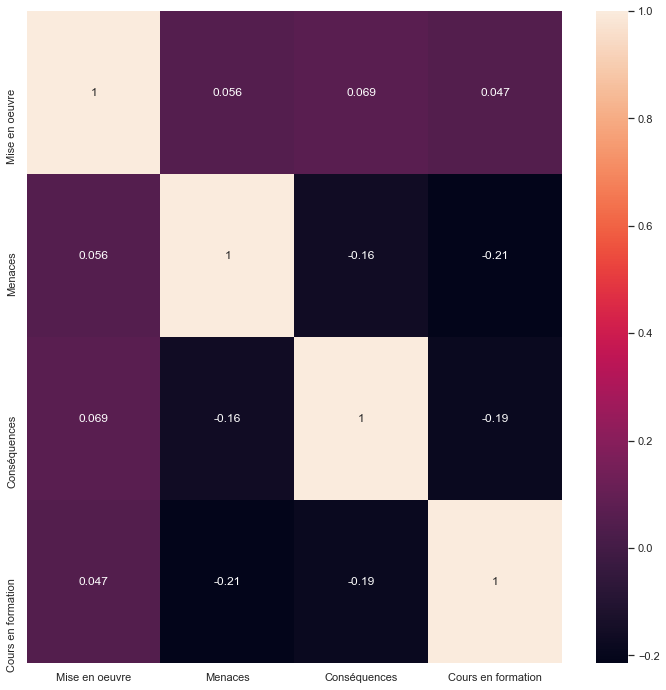

In [19]:
iv1_3ConnaiSuppMoyenneMedian = datasConnaiSuppMoyenne[['suiviCoursSuivi', 'suiviCoursPropose', 'suiviCoursEntendu']].median(axis=1)
iv1_3ConnaiInfMoyenneMedian = datasConnaiInfMoyenne[['suiviCoursSuivi', 'suiviCoursPropose', 'suiviCoursEntendu']].median(axis=1)

moyiv1_3ConnaiSuppMoyenne = iv1_3ConnaiSuppMoyenneMedian.mean()
moyiv1_3ConnaiInfMoyenne = iv1_3ConnaiInfMoyenneMedian.mean()

facteurstest2 = pd.concat([dv1ConnaiInfMoyenneMedian, iv1_1ConnaiInfMoyenneMedian, iv1_2ConnaiInfMoyenneMedian, iv1_3ConnaiInfMoyenneMedian], axis=1)
facteurstest2.columns = ["Mise en oeuvre", "Menaces", "Conséquences", "Cours en formation"]

# Calcul de la significativité
pval = calculate_pvalues(facteurstest2)

# Calcul du Coefficient de corrélation de Pearson
rho = facteurstest2.corr(method='pearson')

# Définition de la taille du graphe
plt.rcParams["figure.figsize"] = [12,12]

# Affichage sur un graphe
sns.heatmap(data=rho, annot=True, color="black")

# Représentation des p-values
r1 = rho.applymap(lambda x: '{:.2f}'.format(x))
r2 = rho.applymap(lambda x: '{:.2f}*'.format(x))
rho = rho.mask(pval>0.05,r1)
rho = rho.mask(pval<=0.05,r2)
pval
